In [2]:
%pylab inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [3]:
colNames = ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
            'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
           'sqft_living15', 'sqft_lot15']
data = pd.read_csv("./kc_house_data.csv", names=colNames, header=0)

In [4]:
data.price = np.log(data.price)
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,12.309982,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,13.195614,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,12.100712,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,13.311329,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,13.142166,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
data.loc[data.yr_renovated == 0, 'yr_renovated'] = data['yr_built']
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,12.309982,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,13.195614,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,12.100712,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,13.311329,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,13.142166,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,1987,98074,47.6168,-122.045,1800,7503


In [7]:
corrmat = data.corr()
corrmat['price'].sort_values(ascending=False)

price            1.000000
grade            0.703634
sqft_living      0.695341
sqft_living15    0.619312
sqft_above       0.601801
bathrooms        0.550802
lat              0.449174
view             0.346522
bedrooms         0.343561
sqft_basement    0.316970
floors           0.310558
waterfront       0.174586
yr_renovated     0.130297
sqft_lot         0.099622
sqft_lot15       0.091592
yr_built         0.080655
long             0.049942
condition        0.039558
id              -0.003819
zipcode         -0.038306
Name: price, dtype: float64

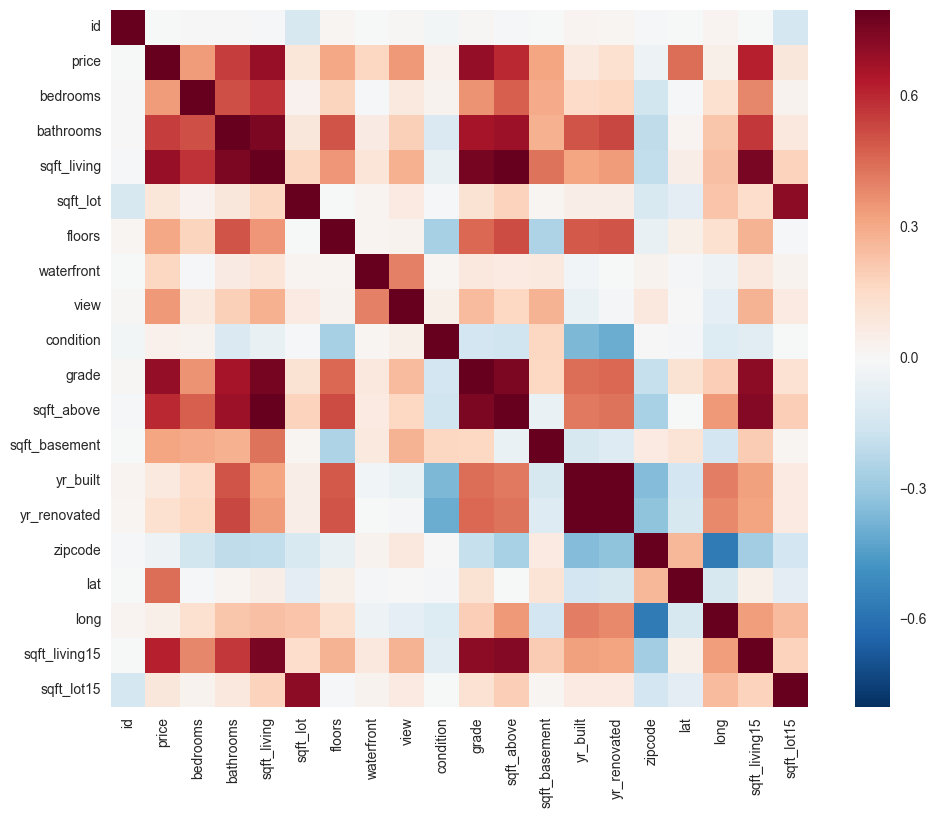

In [8]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True);

In [10]:
features = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
            'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
           'sqft_living15', 'sqft_lot15']

In [11]:
mydata = data[features]

In [12]:
X = mydata.iloc[:, 1:]
y = np.log(mydata.iloc[:, 0])

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
print X_train.shape
print y_train.shape
print X_test.shape
print y_test.shape

(14480, 18)
(14480,)
(7133, 18)
(7133,)


## Model 1: multiple linear regression

In [15]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
for c, i in sorted(zip(regr.coef_, features[1:]), reverse=True):
     print ("% 20s  | coef: %.6f" % (i, c))

                 lat  | coef: 0.109015
          waterfront  | coef: 0.027428
               grade  | coef: 0.011882
              floors  | coef: 0.005919
           bathrooms  | coef: 0.005359
                view  | coef: 0.004701
           condition  | coef: 0.004424
        yr_renovated  | coef: 0.000092
       sqft_living15  | coef: 0.000007
         sqft_living  | coef: 0.000007
       sqft_basement  | coef: 0.000005
          sqft_above  | coef: 0.000003
            sqft_lot  | coef: 0.000000
          sqft_lot15  | coef: -0.000000
             zipcode  | coef: -0.000048
            yr_built  | coef: -0.000348
            bedrooms  | coef: -0.000693
                long  | coef: -0.009083


In [17]:
# The coefficients
#print('Coefficients: \n', regr.coef_)
# The root mean squared error
print("Root mean squared error: %.6f"
      % np.sqrt(np.mean((regr.predict(X_test) - y_test) ** 2)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.6f' % regr.score(X_test, y_test))

Root mean squared error: 0.019606
Variance score: 0.766173


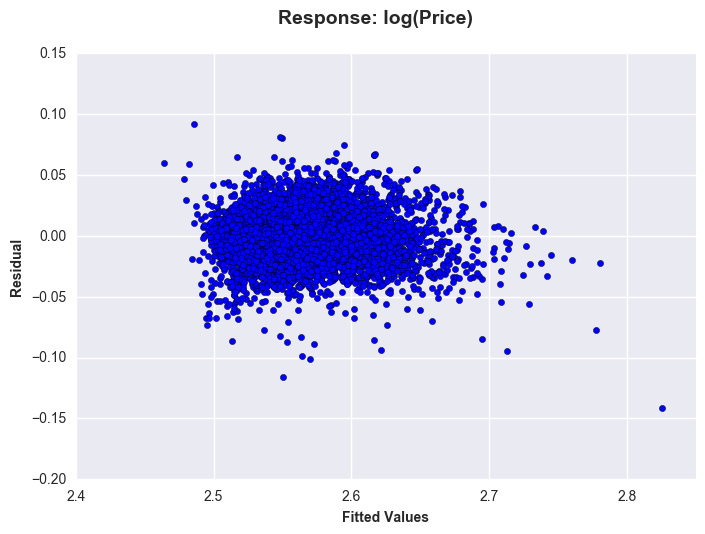

In [18]:
fig = plt.figure()
fig.suptitle('Response: log(Price)', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
ax.set_xlabel('Fitted Values', fontsize=10, fontweight='bold')
ax.set_ylabel('Residual', fontsize=10, fontweight='bold')
ax.scatter(regr.predict(X_test), (y_test-regr.predict(X_test)))
plt.show()

## Model 2: Ridge regression

In [19]:
ridge = linear_model.RidgeCV()
ridge.fit(X_train, y_train)

RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [20]:
ridge.alpha_

0.10000000000000001

In [21]:
print("Root mean squared error: %.6f"
      % np.sqrt(np.mean((ridge.predict(X_test) - y_test) ** 2)))
print('Variance score: %.6f' % ridge.score(X_test, y_test))

Root mean squared error: 0.019640
Variance score: 0.765372


In [22]:
for c, i in sorted(zip(ridge.coef_, features[1:]), reverse=True):
     print ("% 20s  | coef: %.6f" % (i, c))

                 lat  | coef: 0.108968
          waterfront  | coef: 0.027395
               grade  | coef: 0.011884
              floors  | coef: 0.005920
           bathrooms  | coef: 0.005359
                view  | coef: 0.004701
           condition  | coef: 0.004424
        yr_renovated  | coef: 0.000092
       sqft_living15  | coef: 0.000007
         sqft_living  | coef: 0.000007
       sqft_basement  | coef: 0.000005
          sqft_above  | coef: 0.000003
            sqft_lot  | coef: 0.000000
          sqft_lot15  | coef: 0.000000
             zipcode  | coef: -0.000048
            yr_built  | coef: -0.000348
            bedrooms  | coef: -0.000693
                long  | coef: -0.009074


### try with general ridge (no much different than RidgeCV)

In [23]:
ridge2 = linear_model.Ridge(alpha=0.1)
ridge2.fit(X_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [24]:
print("Root mean squared error: %.6f"
      % np.sqrt(np.mean((ridge2.predict(X_test) - y_test) ** 2)))
print('Variance score: %.6f' % ridge2.score(X_test, y_test))

Root mean squared error: 0.019606
Variance score: 0.766174


## Model 3: Lasso

In [25]:
lasso = linear_model.LassoCV()
lasso.fit(X_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [26]:
lasso.alpha_

0.16132410113765153

In [27]:
print("Root mean squared error: %.6f"
      % np.sqrt(np.mean((lasso.predict(X_test) - y_test) ** 2)))
print('Variance score: %.6f' % lasso.score(X_test, y_test))

Root mean squared error: 0.028322
Variance score: 0.512079


In [36]:
for c, i in sorted(zip(lasso.coef_, features[1:]), reverse=True):
     print ("% 20s  | coef: %.6f" % (i, c))

             zipcode  | coef: 0.000405
         sqft_living  | coef: 0.000289
       sqft_living15  | coef: 0.000185
        yr_renovated  | coef: 0.000102
       sqft_basement  | coef: 0.000049
            sqft_lot  | coef: 0.000000
            yr_built  | coef: -0.000000
          waterfront  | coef: 0.000000
                view  | coef: 0.000000
          sqft_above  | coef: -0.000000
                long  | coef: -0.000000
                 lat  | coef: 0.000000
               grade  | coef: 0.000000
              floors  | coef: 0.000000
           condition  | coef: 0.000000
            bedrooms  | coef: -0.000000
           bathrooms  | coef: 0.000000
          sqft_lot15  | coef: -0.000001


### try with general Lasso (much better than LassoCV)

In [28]:
lasso2 = linear_model.Lasso(alpha=10)
lasso2.fit(X_train, y_train)

Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [29]:
print("Root mean squared error: %.6f"
      % np.sqrt(np.mean((lasso2.predict(X_test) - y_test) ** 2)))
print('Variance score: %.6f' % lasso2.score(X_test, y_test))

Root mean squared error: 0.031373
Variance score: 0.401283


In [30]:
for c, i in sorted(zip(lasso2.coef_, features[1:]), reverse=True):
     print ("% 20s  | coef: %.6f" % (i, c))

         sqft_living  | coef: 0.000018
            sqft_lot  | coef: 0.000000
             zipcode  | coef: 0.000000
        yr_renovated  | coef: -0.000000
            yr_built  | coef: -0.000000
          waterfront  | coef: 0.000000
                view  | coef: 0.000000
          sqft_lot15  | coef: 0.000000
       sqft_living15  | coef: 0.000000
       sqft_basement  | coef: 0.000000
          sqft_above  | coef: 0.000000
                long  | coef: -0.000000
                 lat  | coef: 0.000000
               grade  | coef: 0.000000
              floors  | coef: 0.000000
           condition  | coef: 0.000000
            bedrooms  | coef: 0.000000
           bathrooms  | coef: 0.000000


## Model 4: Simple linear regression (sqft)

In [32]:
regr2 = linear_model.LinearRegression()
regr2.fit(X_train[['sqft_living']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
print("Root mean squared error: %.6f"
      % np.sqrt(np.mean((regr2.predict(X_test[['sqft_living']]) - y_test) ** 2)))
print('Variance score (R^2): %.6f' % regr2.score(X_test[['sqft_living']], y_test))

Root mean squared error: 0.029346
Variance score (R^2): 0.476145


## Model 5: Simple linear regression (sqft + lat)

In [34]:
regr3 = linear_model.LinearRegression()
regr3.fit(X_train[['sqft_living', 'lat']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
print("Root mean squared error: %.6f"
      % np.sqrt(np.mean((regr3.predict(X_test[['sqft_living', 'lat']]) - y_test) ** 2)))
print('Variance score (R^2): %.6f' % regr3.score(X_test[['sqft_living', 'lat']], y_test))

Root mean squared error: 0.024018
Variance score (R^2): 0.649114


## Model 6: Simple linear regression (grade + lat + view)

In [36]:
regr4 = linear_model.LinearRegression()
regr4.fit(X_train[['grade', 'lat', 'view']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
print("Root mean squared error: %.6f"
      % np.sqrt(np.mean((regr4.predict(X_test[['grade', 'lat', 'view']]) - y_test) ** 2)))
print('Variance score (R^2): %.6f' % regr4.score(X_test[['grade', 'lat', 'view']], y_test))

Root mean squared error: 0.023372
Variance score (R^2): 0.667740


## Model 7: several selected features

In [38]:
regr5 = linear_model.LinearRegression()
regr5.fit(X_train[['grade', 'lat', 'view', 'waterfront', 'floors', 'bathrooms', 'condition']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
print("Root mean squared error: %.6f"
      % np.sqrt(np.mean((regr5.predict(X_test[['grade', 'lat', 'view', 'waterfront', 'floors', 'bathrooms', 'condition']]) - y_test) ** 2)))
print('Variance score (R^2): %.6f' % regr5.score(X_test[['grade', 'lat', 'view', 'waterfront', 'floors', 'bathrooms', 'condition']], y_test))

Root mean squared error: 0.021984
Variance score (R^2): 0.706018


## Support Vector Regression

In [40]:
from sklearn.svm import SVR
svr_lin = SVR(kernel='linear')
svr_lin.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [41]:
print("Root mean squared error: %.6f"
      % np.sqrt(np.mean((svr_lin.predict(X_test) - y_test) ** 2)))
print('Variance score: %.6f' % svr_lin.score(X_test, y_test))

Root mean squared error: 0.030090
Variance score: 0.449255


In [42]:
for c, i in sorted(zip(svr_lin.coef_[0], features[1:]), reverse=True):
     print ("% 20s  | coef: %.6f" % (i, c))

         sqft_living  | coef: 0.000015
          sqft_above  | coef: 0.000011
       sqft_living15  | coef: 0.000006
       sqft_basement  | coef: 0.000004
        yr_renovated  | coef: 0.000000
            yr_built  | coef: 0.000000
            sqft_lot  | coef: 0.000000
               grade  | coef: 0.000000
           bathrooms  | coef: 0.000000
                view  | coef: 0.000000
            bedrooms  | coef: 0.000000
              floors  | coef: 0.000000
           condition  | coef: 0.000000
          waterfront  | coef: 0.000000
                 lat  | coef: 0.000000
                long  | coef: 0.000000
          sqft_lot15  | coef: -0.000000
             zipcode  | coef: -0.000000


## Random forest regression

In [43]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=0)
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [44]:
print("Root mean squared error: %.6f"
      % np.sqrt(np.mean((rfr.predict(X_test) - y_test) ** 2)))
print('Variance score: %.6f' % rfr.score(X_test, y_test))

Root mean squared error: 0.014681
Variance score: 0.868903


In [47]:
for c, i in sorted(zip(rfr.feature_importances_, features[1:]), reverse=True):
     print ("% 20s  | coef: %.6f" % (i, c))

                 lat  | coef: 0.322880
               grade  | coef: 0.256263
         sqft_living  | coef: 0.234036
                long  | coef: 0.043909
       sqft_living15  | coef: 0.027911
            sqft_lot  | coef: 0.015892
            yr_built  | coef: 0.015613
          sqft_lot15  | coef: 0.014767
          sqft_above  | coef: 0.014478
             zipcode  | coef: 0.011357
                view  | coef: 0.009352
        yr_renovated  | coef: 0.008834
          waterfront  | coef: 0.005957
           bathrooms  | coef: 0.005697
           condition  | coef: 0.005374
       sqft_basement  | coef: 0.003129
            bedrooms  | coef: 0.002778
              floors  | coef: 0.001774


### lat, grade, sqft_living are the 3 most important features.

In [51]:
mydata.lat.describe()

count    21613.000000
mean        47.560053
std          0.138564
min         47.155900
25%         47.471000
50%         47.571800
75%         47.678000
max         47.777600
Name: lat, dtype: float64